### Підключення бібліотек

In [31]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Підготовка датасету

Мій датасет - результат аналізу найкращих пісень за 2010-2019 роки на платформі Spotify.Кількість стовпців - 14.

Стовпці датасету представляють такі характеристики пісні:

title — назва;

artist — ім'я виконавця;

top genre - назва жанру;

year - рік випуску;

bpm - (beats per minute) темп;

nrgy - коефіцієнт енергійності (чим вище значення, тим пісня енергічніша);

dnce - коефіцієнт можливості танцювання (чим вище значення, тим легше під неї танцювати);

dB - гучність (чим вище значення, тим пісня гучніша);

live - коефіцієнт живого запису (чим вище значення, тим більша імовірність, що трек записувався із живими інструментами);

val - мотив (чим вище значення, тим веселіший мотив);

dur - тривалість (в секундах);

acous - акустичність (чим вище значення, тим менше відлуння);

spch - коефіцієнт розмовності (чим вище значення, тим більше слів різноманітних слів було використано);

pop - коефіцієнт популярності (чим вище значення, тим більша популярність).

P.S. Значення визначене як коефіцієнт має можливий діапазон значень від 0 до 100.

In [32]:
# Датасет взято із https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/AlexRedchuk/csvSharing/master/top10s.csv"

df = pd.read_csv(url, encoding='cp1252')
df.drop('Unnamed: 0', inplace=True, axis=1)

df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [33]:
#sub_df = df[df.groupby('top genre')['top genre'].transform('count')>30].copy() 
sub_df['top genre'].value_counts()

dance pop       327
pop              60
canadian pop     34
Name: top genre, dtype: int64

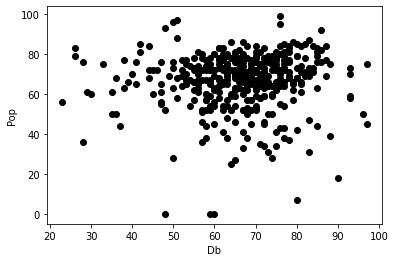

In [34]:
X = sub_df[["dnce","pop"]]
y = sub_df["top genre"]
#Visualise data points
plt.scatter(X["dnce"],X["pop"],c='black')
plt.xlabel('Db')
plt.ylabel('Pop')
plt.show()

(421,)


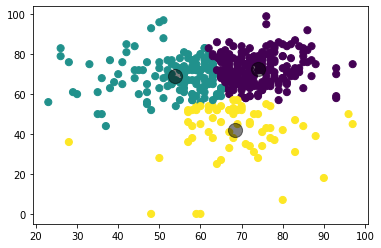

In [35]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(X)
print(km.predict(X).shape)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=km.labels_,
s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
c='black', s=200, alpha=0.5)
plt.show()

c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:231: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

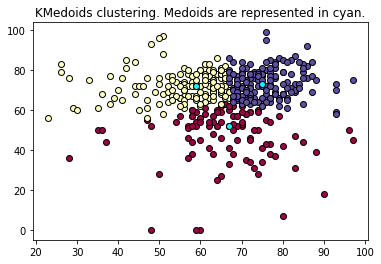

In [36]:
from sklearn_extra.cluster import KMedoids

cobj = KMedoids(n_clusters=3).fit(X)
labels = cobj.labels_

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k
    xy = X[class_member_mask]
    plt.plot(
    xy.iloc[:, 0],
    xy.iloc[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="k",
    markersize=6)
plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6)
plt.title("KMedoids clustering. Medoids are represented in cyan.")

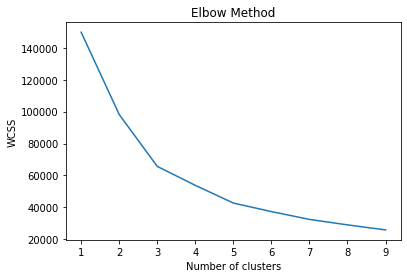

In [37]:
wcss=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
    n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

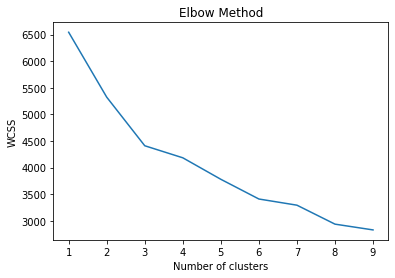

In [38]:
wcss=[]
for i in range(1, 10):
    kmedoids = KMedoids(n_clusters=i, init='k-medoids++', max_iter=300,
    random_state=0)
    kmedoids.fit(X)
    wcss.append(kmedoids.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            refDisp = km.inertia_
            refDisps[i] = refDisp
    # Fit cluster to original data and create dispersion
    km = KMeans(k)
    km.fit(data)
    origDisp = km.inertia_
    # Calculate gap statistic
    gap = np.log(np.mean(refDisps)) - np.log(origDisp)
    # Assign this loop's gap statistic to gaps
    gaps[gap_index] = gap
    resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf) # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are
    optimal

In [40]:
k, gapdf = optimalK(X, nrefs=3, maxClusters=15)
print('Optimal k is:',k)

Optimal k is: 1


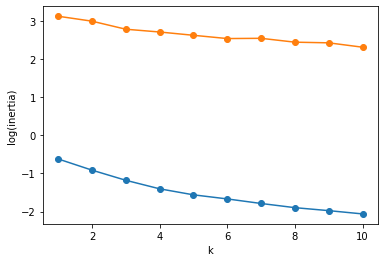

In [41]:
from sklearn.metrics import pairwise_distances

reference = np.random.rand(100, 2)
def compute_inertia(a, X):
    X = np.array(X)
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)
def compute_gap(clustering, k_max=10, n_references=10):
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
        
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(X)
        ondata_inertia.append(compute_inertia(assignments, X))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

gap, reference_inertia, ondata_inertia = compute_gap(KMeans())
plt.plot(range(1, 11), reference_inertia,
'-o', label='reference')
plt.plot(range(1, 11), ondata_inertia,
'-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.show()

c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:231: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:231: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:231: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:231: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluste

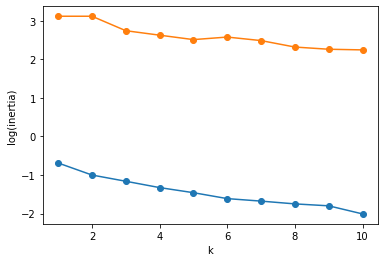

In [42]:
from sklearn.metrics import pairwise_distances

reference = np.random.rand(100, 2)
def compute_inertia(a, X):
    X = np.array(X)
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)
def compute_gap(clustering, k_max=10, n_references=10):
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
        
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(X)
        ondata_inertia.append(compute_inertia(assignments, X))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

gap, reference_inertia, ondata_inertia = compute_gap(KMedoids())
plt.plot(range(1, 11), reference_inertia,
'-o', label='reference')
plt.plot(range(1, 11), ondata_inertia,
'-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.show()

(421,)


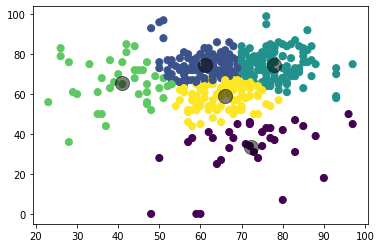

In [43]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(X)
print(km.predict(X).shape)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=km.labels_,
s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
c='black', s=200, alpha=0.5)
plt.show()

c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:231: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

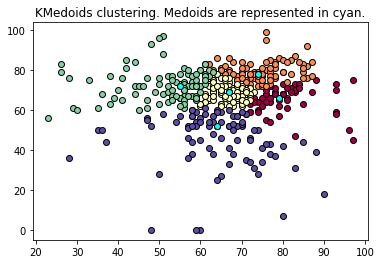

In [44]:
from sklearn_extra.cluster import KMedoids

cobj = KMedoids(n_clusters=5).fit(X)
labels = cobj.labels_

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k
    xy = X[class_member_mask]
    plt.plot(
    xy.iloc[:, 0],
    xy.iloc[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="k",
    markersize=6)
plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6)
plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [45]:
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering



algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=3, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=3))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,-0.029856,0.019944,0.031886,0.021360,0.025583,0.364220
Affinity,-0.001527,0.020024,0.148858,0.033292,0.054414,0.335517
Spectral,-0.013919,0.033220,0.049917,0.031401,0.038551,0.337102
Agglomerative,-0.058641,0.023362,0.034827,0.025223,0.029257,0.368654


### Робота із зображеннями

In [46]:
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [47]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

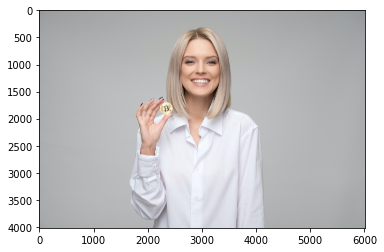

In [48]:
# import the image
from skimage import io
image = io.imread('girl.jpg') 
plt.imshow(image);

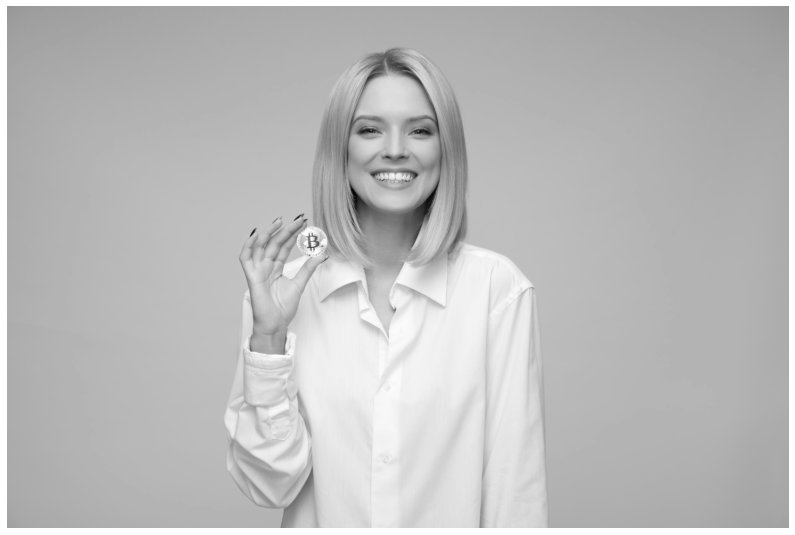

In [49]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [50]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [80, 250], 80)[:-1]

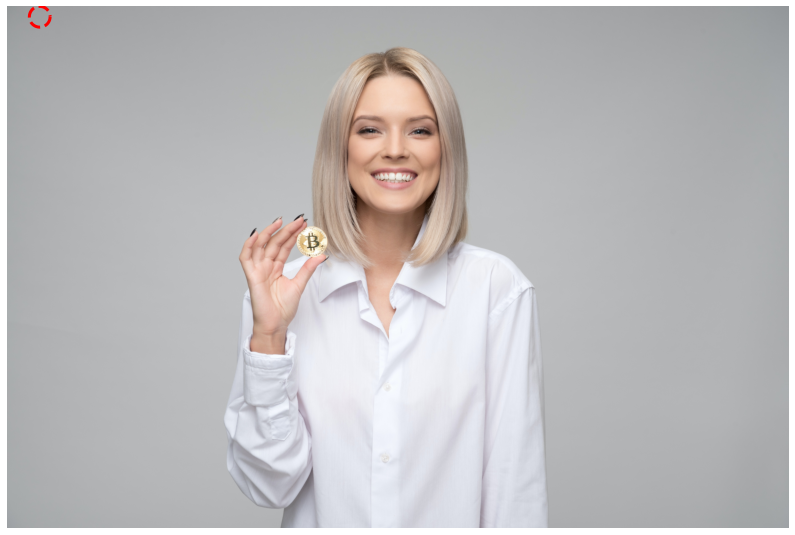

In [51]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

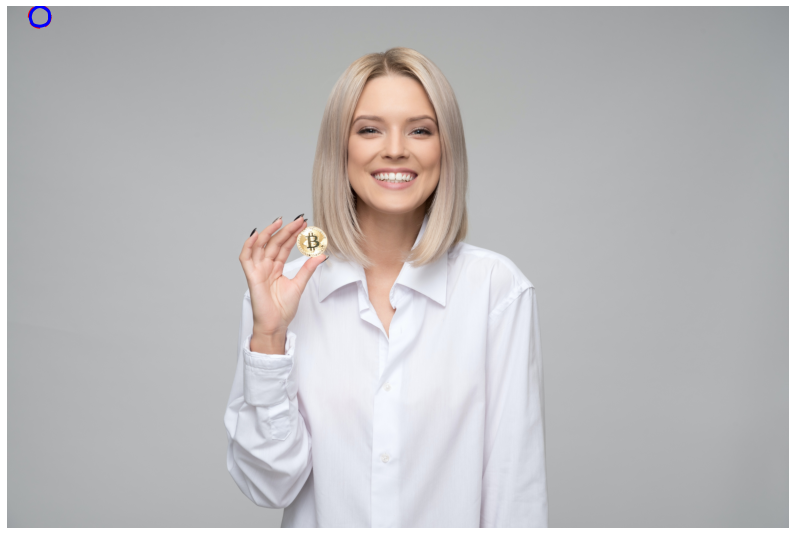

In [52]:
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

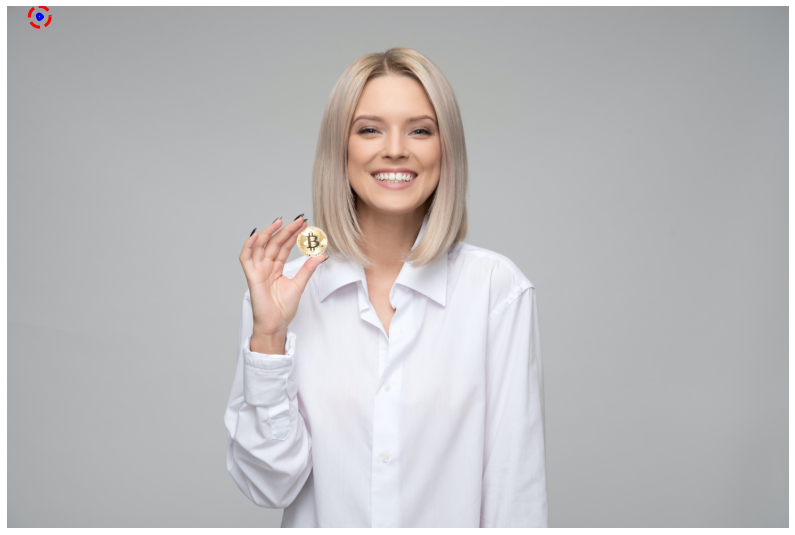

In [53]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);